# Harish Practise : Salary Estimation Using K Nearest Neighbour

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('salary.csv')
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [3]:
dataset.shape

(32561, 5)

In [16]:
X = dataset[['age', 'education.num','capital.gain','hours.per.week']]
X

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
...,...,...,...,...
32556,22,10,0,40
32557,27,12,0,38
32558,40,9,0,40
32559,58,9,0,40


# Mapping Salary Data to Binary Data

In [4]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


# Feature And Target

In [21]:
X = dataset[['age', 'education.num','capital.gain','hours.per.week']]

In [17]:
print(X)

       age  education.num  capital.gain  hours.per.week
0       90              9             0              40
1       82              9             0              18
2       66             10             0              40
3       54              4             0              40
4       41             10             0              40
...    ...            ...           ...             ...
32556   22             10             0              40
32557   27             12             0              38
32558   40              9             0              40
32559   58              9             0              40
32560   22              9             0              20

[32561 rows x 4 columns]


In [8]:
X = dataset.iloc[:, :-1].values  #All columns except last → Features
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [25]:
y = dataset.iloc[:, -1].values  #Only last column → Labels (income)
y

array([0, 0, 0, ..., 1, 0, 0])

# Splitting Dataset into Train Test Split

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=0)

# Feature Scaling 
we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data ###Transform - Transform method is transforming all the features using the respective mean and variance, ###We want our test data to be a completely new and a surprise set for our model

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# *Finding the Best K-Value*

In [ ]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Training

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

# *Predicting, wheather new customer with Age & Salary will Buy or Not*

In [32]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 68
Enter New Employee's Education: 9
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 40
[0]
Customer might not got  Salary above 50K


C:\Users\91829\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# *Prediction for all Test Data*

In [33]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 1]]


# *Evaluating Model - CONFUSION MATRIX*

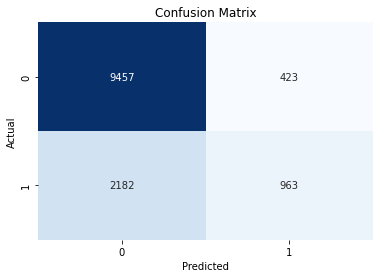

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 80.0

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      9880
           1       0.69      0.31      0.43      3145

    accuracy                           0.80     13025
   macro avg       0.75      0.63      0.65     13025
weighted avg       0.78      0.80      0.77     13025

